# Implement V subtraction method

### Apr 1, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/SourceSearch")
# import pyrex.custom.ara as ara


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


In [60]:
file_list=[]#Define an empty list
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/recoFiles"):#Loop over desired directory
    if filename.endswith(".root"): #extension, .root in this case
        file_list.append(os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/recoFiles", str(filename))) #add file name to the list

In [61]:
chain = TChain("OutputTree") #Define chain and tree that needs to be read. "RecoVals" in this case.
for line in file_list:
    chain.AddFile(line)

In [62]:
phi = []
theta = []
phi_h = []
theta_h = []
viewAnglAvg = []
corr_value = []
weights = []
for entry in chain:
#     if(entry.peakCorr_single[0]<0.01): continue
#     if(entry.peakPhi_single[0]<0):
#         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
#     else:
    phi.append(entry.peakPhi_single[0]) 
    phi_h.append(entry.peakPhi_single[1]) 
    theta.append(entry.peakTheta_single[0])
    theta_h.append(entry.peakTheta_single[1])
    viewAnglAvg.append(entry.viewAngleAvg[0])
    corr_value.append(entry.peakCorr_single[0])
    weights.append(entry.weight)

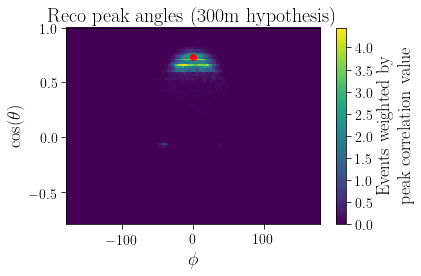

In [63]:
# plt.style.use("default")
plt.hist2d(phi,np.cos(np.radians(np.array(theta)+56)), bins=[180,100], weights=corr_value);
plt.colorbar(label="Events weighted by \n peak correlation value")
plt.scatter(0,np.cos(np.radians(43)), color="red")
plt.xlabel("$\phi$")
plt.ylabel("$\cos(\\theta)$")
plt.title("Reco peak angles (300m hypothesis)")
plt.tight_layout()
# plt.savefig("CenA_reco_peak300m_CskyWeight_direct_Hpol.pdf")

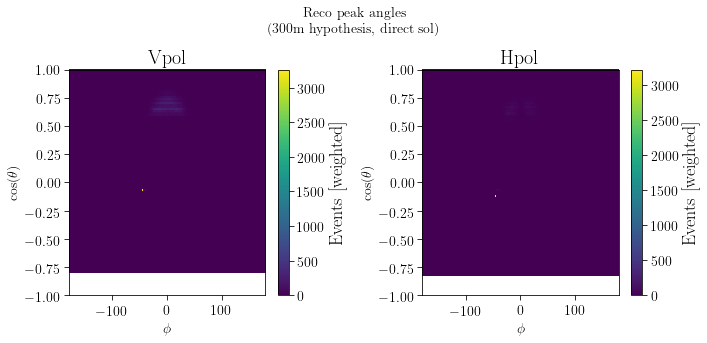

In [65]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
cm = plt.cm.get_cmap('viridis')
p1 = ax[0].hist2d(phi,np.cos(np.radians(np.array(theta)+56)), bins=[180,100],weights=weights,cmap=cm)
# plt.hist2d(phi_h,np.cos(np.radians(theta_h)), bins=[180,100]);
plt.colorbar(p1[3],ax=ax[0],label="Events [weighted]")
# ax[0].scatter(0,np.cos(np.radians(43)), color="red")
ax[0].set_xlabel("$\phi$", fontsize=14)
ax[0].set_ylim(-1,1)
ax[0].set_ylabel("$\cos(\\theta)$", fontsize=14)
ax[0].set_title("Vpol")

p2 = ax[1].hist2d(phi_h,np.cos(np.radians(np.array(theta_h)+56)),weights=weights, bins=[180,100],cmap=cm)
# plt.hist2d(phi_h,np.cos(np.radians(theta_h)), bins=[180,100]);
plt.colorbar(p2[3],ax=ax[1],label="Events [weighted]")
# ax[1].scatter(0,np.cos(np.radians(43)), color="red")
ax[1].set_xlabel("$\phi$", fontsize=14)
ax[1].set_ylim(-1,1)
ax[1].set_ylabel("$\cos(\\theta)$", fontsize=14)
ax[1].set_title("Hpol")
plt.suptitle("Reco peak angles \n (300m hypothesis, direct sol)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, .9])
# plt.savefig("CenA_reco_peak300m_NoWeight_direct.pdf")

In [29]:
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

x=phi
y=np.cos(np.radians(theta)+56)
# y = theta
xy = np.vstack([x,y])
kernel = gaussian_kde(xy, bw_method='silverman')

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

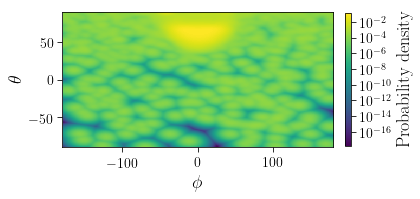

In [30]:
X, Y = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)
# plt.figure(figsize=(10, 15))
cmap = plt.get_cmap('PiYG')
cmap = plt.imshow(np.rot90(Z), cmap=plt.cm.viridis,
          extent=[xmin, xmax, -90, 90],norm=LogNorm())
plt.colorbar(cmap,label='Probability density',fraction=0.023, pad=0.04)
plt.xlim(-180,180)
# plt.ylim(-1,1)
plt.xlabel("$\phi$")
plt.ylabel("$\\theta$")

plt.tight_layout()
# plt.savefig("KDE_CenA_reco.pdf", dpi=200)

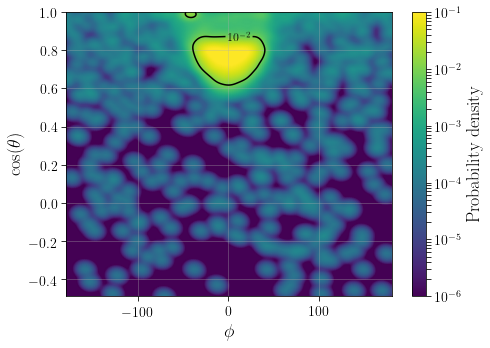

In [43]:
from matplotlib import ticker, cm
plt.figure(figsize=(7,5))
levels = [1e-2]

contours = plt.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
# cmap = plt.contourf(X, Y, Z,200)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=1e-1))

# cmap = plt.get_cmap('PiYG')
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
# plt.title("Hpol", fontsize=14)
plt.xlabel("$\phi$")
plt.ylabel("$\cos(\\theta)$")
plt.grid(alpha=0.4)
plt.tight_layout()
# plt.savefig("KDE_CenA_recoPeak_300m_hpol.pdf", dpi=300)

In [49]:
v = contours.collections[0].get_paths()[1].vertices
x = v[:,0]
y = v[:,1]

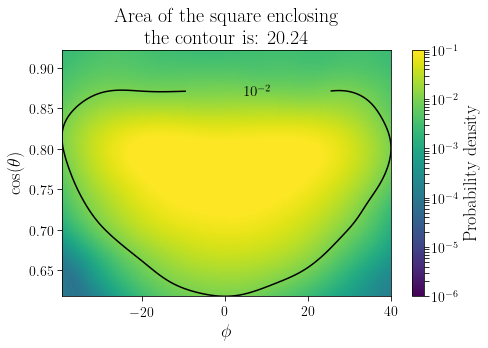

In [59]:
levels = [1e-2]
plt.figure(figsize=(7,5))

contours = plt.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
# cmap = plt.contourf(X, Y, Z,200)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True, fontsize=15)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=0.1))

# cmap = plt.get_cmap('PiYG')
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
# plt.colorbar(contours,label='Probability density')
plt.ylim(y.min(),y.max()+0.05)
plt.xlim(x.min(),x.max())
plt.xlabel("$\phi$")
plt.ylabel("$\cos(\\theta)$")
plt.title("Area of the square enclosing \n the contour is: %0.2f" % (abs(x.max()-x.min())*abs(y.max()-y.min())))
plt.tight_layout()
# plt.savefig("1E2Box_CenA_recoPeak_300m.pdf", dpi=100)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.49669296, 0.59669296, 0.69669296, 0.79669296, 0.89669296,
        0.99669296, 1.09669296, 1.19669296, 1.29669296, 1.39669296,
        1.49669296]),
 <a list of 10 Patch objects>)

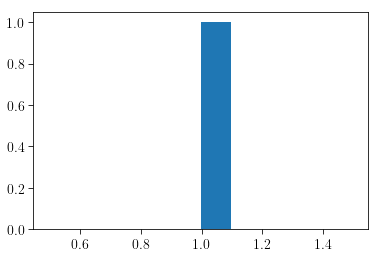

In [66]:
plt.hist(entry.weight, bins=1)